In [2]:
# imports and dependencies, api_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import datetime

#import gmaps

In [3]:
# import gmaps API key for heat map
#from config import gkey

# Configure gmaps
#gmaps.configure(api_key=gkey)

In [4]:
# file to load
path = "./Accident_Info.csv"

In [5]:
# initial data read for San Francisco
data = pd.read_csv( path )

In [6]:
# Clean data of duplicates and missing values, rename columns
df = pd.DataFrame( data )

In [7]:
# formatting of data, NaN handling
df = df[["Accident_Index", "Accident_Severity",
         "Date", "Day_of_Week",
         "Junction_Control", "Junction_Detail",
         "Latitude", "Longitude", "Light_Conditions",
         "Road_Surface_Conditions", "Speed_limit",
         "Time", "Urban_or_Rural_Area",
         "Weather_Conditions", "Year"]]
df = df.rename(index=str, columns={"Accident_Index": "Accident",
                                   "Accident_Severity": "Severity",
                                   "Day_of_Week": "Day",
                                   "Junction_Control": "Traffic Control",
                                   "Junction_Detail": "Junction Type",
                                   "Light_Conditions": "Light",
                                   "Road_Surface_Conditions": "Road Cond.",
                                   "Speed_limit": "Speed Limit",
                                   "Urban_or_Rural_Area": "City Type",
                                   "Weather_Conditions": "Weather"})
df = df.set_index( "Accident" )

In [8]:
# preview of data
df.head()

,Severity,Date,Day,Traffic Control,Junction Type,Latitude,Longitude,Light,Road Cond.,Speed Limit,Time,City Type,Weather,Year
Accident,,,,,,,,,,,,,,
200501BS00001,Serious,1/4/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,51.489096,-0.191170,Daylight,Wet or damp,30,17:42,Urban,Raining no high winds,2005
200501BS00002,Slight,1/5/2005,Wednesday,Auto traffic signal,Crossroads,51.520075,-0.211708,Darkness - lights lit,Dry,30,17:36,Urban,Fine no high winds,2005
200501BS00003,Slight,1/6/2005,Thursday,Data missing or out of range,Not at junction or within 20 metres,51.525301,-0.206458,Darkness - lights lit,Dry,30,0:15,Urban,Fine no high winds,2005
200501BS00004,Slight,1/7/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,51.482442,-0.173862,Daylight,Dry,30,10:35,Urban,Fine no high winds,2005
200501BS00005,Slight,1/10/2005,Monday,Data missing or out of range,Not at junction or within 20 metres,51.495752,-0.156618,Darkness - lighting unknown,Wet or damp,30,21:13,Urban,Fine no high winds,2005


## Subject Headline

### Subject focus

trend1 description / question / prompt

In [10]:
# Store latitude and longitude in locations
locations = df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
df_sev = df["Severity"]

#convert severity into 1 2 or 3 in a new list

new_list = []
for severity_value in df_sev:
   if severity_value == "Slight":
       new_list.append(.05)
   if severity_value == "Serious":
       new_list.append(.5)
   if severity_value == "Fatal":
       new_list.append(5)

In [11]:
# choose columns to work on
time_df = pd.read_csv( path, parse_dates=[['Date', 'Time']] )
time_df = time_df.rename(index=str, columns={"Accident_Severity": "Severity"})
time_df = time_df[['Severity', 'Year', 'Date_Time']]

In [12]:
# join DataFrames and index using DateTimeIndex
time_df = time_df.set_index('Date_Time')
time_df.head()

,Severity,Year
Date_Time,,
2005-01-04 17:42:00,Serious,2005
2005-01-05 17:36:00,Slight,2005
2005-01-06 00:15:00,Slight,2005
2005-01-07 10:35:00,Slight,2005
2005-01-10 21:13:00,Slight,2005


In [13]:
weehours = time_df.between_time( '0:00', '3:59' )
weehours = weehours.reset_index()
weehours_gb = weehours.groupby( ['Severity'] ).count()
weehours = pd.DataFrame( weehours_gb )[['Date_Time']]

weehours = weehours.rename( columns={"Date_Time":"Before\n4am"})
weehours

,Before 4am
Severity,
Fatal,177
Serious,1315
Slight,5372


In [14]:
early = time_df.between_time( '4:00', '7:59' )
early = early.reset_index()
early_gb = early.groupby( ['Severity'] ).count()
early = pd.DataFrame( early_gb )[['Date_Time']]

early = early.rename( columns={"Date_Time":"Between\n4am - 8am"})
early

,Between 4am - 8am
Severity,
Fatal,116
Serious,1603
Slight,8912


In [15]:
rushhour = time_df.between_time( '8:00', '11:59' )
rushhour = rushhour.reset_index()
rushhour_gb = rushhour.groupby( ['Severity'] ).count()
rushhour = pd.DataFrame( rushhour_gb )[['Date_Time']]

rushhour = rushhour.rename( columns={"Date_Time":"Between\n8am - noon"})
rushhour

,Between 8am - noon
Severity,
Fatal,189
Serious,3507
Slight,27562


In [16]:
afternoon = time_df.between_time( '12:00', '15:59' )
afternoon = afternoon.reset_index()
afternoon_gb = afternoon.groupby( ['Severity'] ).count()
afternoon = pd.DataFrame( afternoon_gb )[['Date_Time']]

afternoon = afternoon.rename( columns={"Date_Time":"Between\nnoon - 4pm"})
afternoon

,Between noon - 4pm
Severity,
Fatal,186
Serious,4040
Slight,31082


In [17]:
evening = time_df.between_time( '16:00', '19:59' )
evening = evening.reset_index()
evening_gb = evening.groupby( ['Severity'] ).count()
evening = pd.DataFrame( evening_gb )[['Date_Time']]

evening = evening.rename( columns={"Date_Time":"Between\n4pm - 8pm"})
evening

,Between 4pm - 8pm
Severity,
Fatal,268
Serious,5009
Slight,36311


In [18]:
night = time_df.between_time( '20:00', '23:59' )
night = night.reset_index()
night_gb = night.groupby( ['Severity'] ).count()
night = pd.DataFrame( night_gb )[['Date_Time']]

night = night.rename( columns={"Date_Time":"8pm -\nmidnight"})
night

,8pm - midnight
Severity,
Fatal,195
Serious,2891
Slight,16487


In [19]:
times_df = weehours.join( early ).join( afternoon).join( evening ).join( night )
times_df

,Before 4am,Between 4am - 8am,Between noon - 4pm,Between 4pm - 8pm,8pm - midnight
Severity,,,,,
Fatal,177,116,186,268,195
Serious,1315,1603,4040,5009,2891
Slight,5372,8912,31082,36311,16487


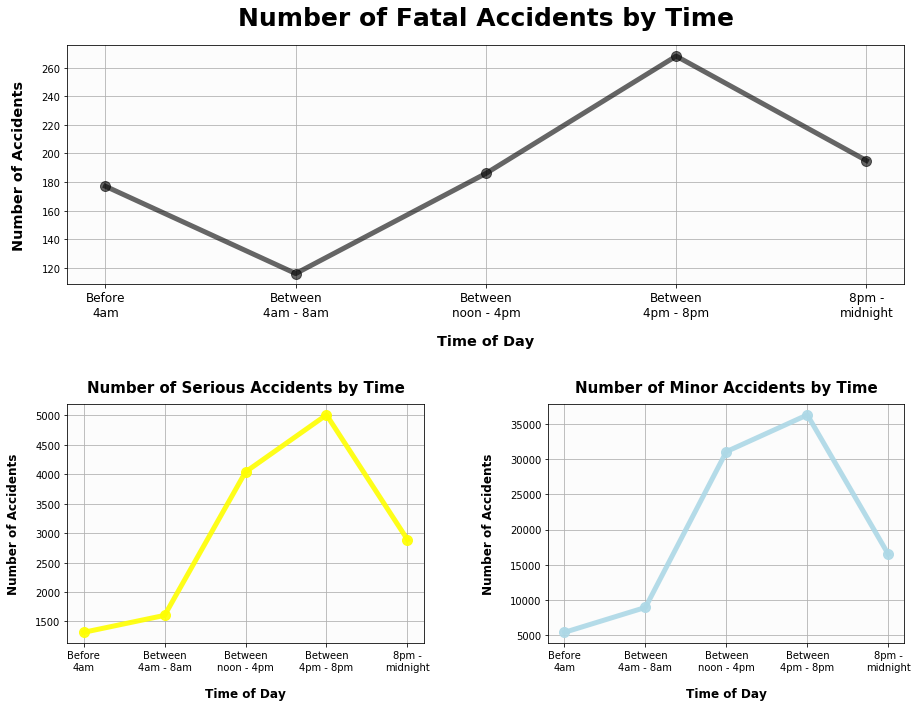

In [21]:
# Setup top graph
ax1_df = pd.DataFrame({'times': times_df.columns, 'accidents': [177,116,186,268,195]})
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax1.plot( 'times', 'accidents', data=ax1_df,
         marker='o', markersize=10.0, linewidth=5.0, color="black", alpha=0.6)
plt.grid( True )

# Setup left graph
ax2_df = pd.DataFrame({'times': times_df.columns, 'accidents': [1315,1603,4040,5009,2891]})
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax2.plot( 'times', 'accidents', data=ax2_df,
         marker='o', markersize=10.0, linewidth=5.0, color="yellow", alpha=0.9)
plt.grid( True )

# Setup right graph
ax3_df = pd.DataFrame({'times': times_df.columns, 'accidents': [5372,8912,31082,36311,16487]})
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
ax3.plot( 'times', 'accidents', data=ax3_df, label="Number of Slight Accidents by Time",
         marker='o', markersize=10.0, linewidth=5.0, color="lightblue", alpha=0.9)
plt.grid( True )

# Label graphs
#      Top graph
ax1.set_xticklabels( labels=times_df.columns, fontsize='large' )
ax1.set_title( label="Number of Fatal Accidents by Time", pad=20,
              fontdict={'fontweight': 'bold', 'fontsize': 25} )
ax1.set_xlabel( "Time of Day", labelpad=15, fontweight='bold', fontsize='x-large' )
ax1.set_ylabel( "Number of Accidents", labelpad=15, fontweight='bold', fontsize='x-large' )

#      Left graph
ax2.set_title( label="Number of Serious Accidents by Time", pad=12,
              fontdict={'fontweight': 'bold', 'fontsize': 15} )
ax2.set_xlabel( "Time of Day", labelpad=15, fontweight='bold', fontsize='large' )
ax2.set_ylabel( "Number of Accidents", labelpad=15, fontweight='bold', fontsize='large' )

#      Right graph
ax3.set_title( label="Number of Minor Accidents by Time", pad=12,
              fontdict={'fontweight': 'bold', 'fontsize': 15} )
ax3.set_xlabel( "Time of Day", labelpad=15, fontweight='bold', fontsize='large' )
ax3.set_ylabel( "Number of Accidents", labelpad=15, fontweight='bold', fontsize='large' )

# Fill graph backgrounds
ax1.set_facecolor( '0.99' )
ax2.set_facecolor( '0.99' )
ax3.set_facecolor( '0.99' )

# Setup spacing of graphs
plt.gcf().set_size_inches(15, 11)
plt.subplots_adjust( wspace=0.35, hspace = 0.5 )

# Save figure as .png
plt.savefig( "./Visuals/time_vs_severity.png", bbox='tight')

trend2 description / question / prompt

In [ ]:
# Plot Heatmap
map = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = new_list,
                                dissipating=False, max_intensity=2,
                                point_radius=.0027)


# Add layer
map.add_layer(heat_layer)

# Display figure
map

trend3 description / question / prompt

In [22]:
# re-format/style data for trend3
Day_of_week = ["Monday" , "Tuesday", "Wednesday" , "Thursday" , "Friday" , "Saturday" , "Sunday" ]
Accidents = [20533, 22399 , 22607 , 21856 , 23357 , 19077 , 15393]

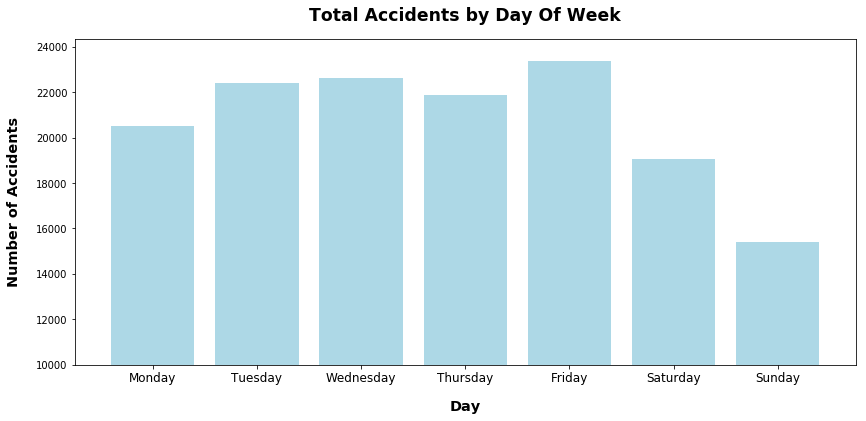

<Figure size 432x288 with 0 Axes>

In [24]:
# manipulate data
# setup analysis
x_axis = np.arange(0, len(Day_of_week))
tick_locations = []
for x in x_axis:
   tick_locations.append(x)

# setup limits
plt.xlim(-0.75, len(Day_of_week)-.25)
plt.ylim(10000, max(Accidents) + 1000, 5000)

# setup labels
plt.title( "Total Accidents by Day Of Week", pad=18,
          fontdict={'fontweight': 'bold', 'fontsize': 'xx-large'} )
plt.xlabel("Day", labelpad=15, fontweight='bold', fontsize='x-large')
plt.ylabel("Number of Accidents", labelpad=15, fontweight='bold', fontsize='x-large')


# plot specifications
plt.bar(x_axis, Accidents, facecolor="lightblue", alpha=1, align="center")
plt.xticks(tick_locations, Day_of_week, fontsize='large')

# visualization of data
plt.gcf().set_size_inches(14, 6)
plt.show()

# Save figure as .png
plt.savefig( "./Visuals/day_vs_severity.png", bbox='tight')

In [25]:
# choose columns to work on
month_df = df[['Severity', 'Year']]
month_df.head()

,Severity,Year
Accident,,
200501BS00001,Serious,2005
200501BS00002,Slight,2005
200501BS00003,Slight,2005
200501BS00004,Slight,2005
200501BS00005,Slight,2005


In [26]:
month_ser = pd.to_datetime(df['Date'],format= '%m/%d/%Y' ).dt.month
month_ser.head()

Accident
200501BS00001    1
200501BS00002    1
200501BS00003    1
200501BS00004    1
200501BS00005    1
Name: Date, dtype: int64

In [27]:
# relabel values as months
month_ser = month_ser.replace({
            1: "January",
            2: "February",
            3: "March",
            4: "April",
            5: "May",
            6: "June",
            7: "July",
            8: "August",
            9: "September",
            10: "October",
            11: "November",
            12: "December"})

# convert back to DataFrame
month_ser = month_ser.to_frame()
month_ser = month_ser.rename( columns={'Date': 'Month'} )
month_ser.head()

# merge DataFrames
months = month_df.join( month_ser )

In [28]:
months.head(10)

,Severity,Year,Month
Accident,,,
200501BS00001,Serious,2005,January
200501BS00002,Slight,2005,January
200501BS00003,Slight,2005,January
200501BS00004,Slight,2005,January
200501BS00005,Slight,2005,January
200501BS00006,Slight,2005,January
200501BS00007,Slight,2005,January
200501BS00009,Slight,2005,January
200501BS00010,Slight,2005,January


In [39]:
# make pivot table for month v. severity
piv = months.pivot_table( values='Year', index='Month', columns='Severity', aggfunc=len )
piv

Severity,Fatal,Serious,Slight
Month,,,
April,87,1478,9878
August,90,1478,9943
December,117,1321,9309
February,86,1298,8923
January,91,1382,9308
July,95,1630,11342
June,99,1713,11247
March,81,1554,10286
May,71,1616,11125


In [40]:
# define order of months
order = [ "January", "February", "March", "April",
            "May", "June", "July", "August",
            "September", "October", "November","December"]

# groupby and maintain order
months_gb = months.groupby( ['Month'], sort=False ).count()
months_comb = pd.DataFrame( months_gb )[['Severity']]
months_comb

,Severity
Month,
January,10781
February,10307
March,11921
April,11443
May,12812
June,13059
July,13067
August,11511
September,12954


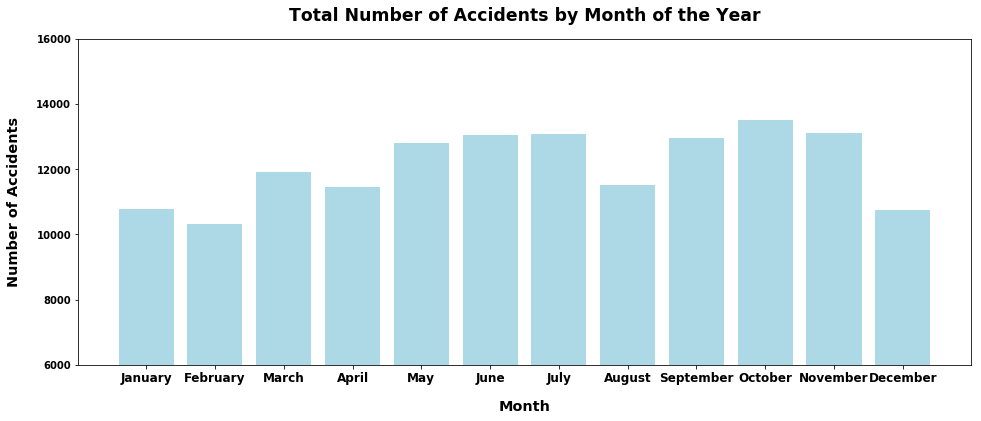

<Figure size 432x288 with 0 Axes>

In [63]:
# manipulate data
# setup analysis
plt.bar( order, months_comb['Severity'].tolist(), facecolor="lightblue", alpha=1, align="center")

# setup limits
plt.ylim(6000, 16000, 2000)

# setup labels
plt.title( "Total Number of Accidents by Month of the Year", pad=18,
          fontdict={'fontweight': 'bold', 'fontsize': 'xx-large'} )
plt.xticks( label=order, fontsize='large' )
plt.xlabel( "Month", labelpad=15, fontweight='bold', fontsize='x-large' )
plt.ylabel( "Number of Accidents", labelpad=15, fontweight='bold', fontsize='x-large' )

# visualization of data
plt.gcf().set_size_inches(16, 6)
plt.show()

# Save figure as .png
plt.savefig( "./Visuals/month_vs_severity.png", bbox='tight')

## Subject Headline

### Subject focus

trend1 description / question / prompt

In [42]:
# Combining similar light conditions together
light_df = df[['Light', 'Year', 'Severity']]

light_df['Light'] = light_df["Light"].replace(
   {"Darkness - lighting unknown": "Unknown", "Darkness - lights lit": "Night Light",
   "Darkness - lights unlit": "Dark",
   "Darkness - no lighting": "Dark",
 })
light_df.head()

C:\Users\Bails\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Light,Year,Severity
Accident,,,
200501BS00001,Daylight,2005,Serious
200501BS00002,Night Light,2005,Slight
200501BS00003,Night Light,2005,Slight
200501BS00004,Daylight,2005,Slight
200501BS00005,Unknown,2005,Slight


In [43]:
# re-format/style data for trend1
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )
light_gb = light_df.groupby(['Light', 'Severity']).count()

# Convert to DataFrame
light = pd.DataFrame( light_gb )[['Year']]

# Preview DataFrame
light

Year
Light       Severity       
Dark        Fatal        14
            Serious      82
            Slight      384
Daylight    Fatal       618
            Serious   12175
            Slight    90464
Night Light Fatal       494
            Serious    6037
            Slight    34428
Unknown     Fatal         5
            Serious      71
            Slight      450

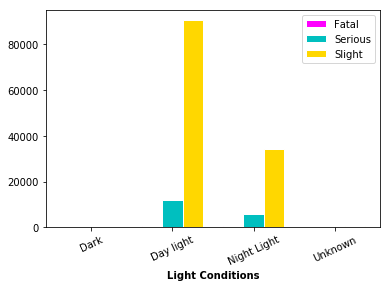

In [44]:
# Bar chart
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [14, 618, 494, 5]
bars2 = [82, 12175, 6037, 71]
bars3 = [384, 90464, 34428, 450]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='magenta', width=barWidth, edgecolor='white', label='Fatal')
plt.bar(r2, bars2, color='c', width=barWidth, edgecolor='white', label='Serious')
plt.bar(r3, bars3, color='gold', width=barWidth, edgecolor='white', label='Slight')
 
# Add xticks on the middle of the group bars
plt.xlabel('Light Conditions', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Dark', 'Day light', 'Night Light', 'Unknown'], rotation = 25)
 
# Create legend & Show graphic
plt.legend()
plt.show()

AttributeError: Unknown property type

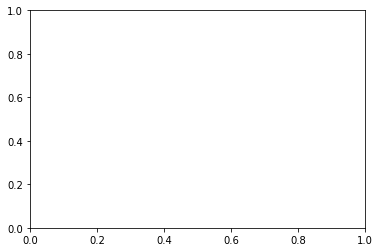

In [45]:
# Choose the height of the bars
height = [14, 618, 494, 5]
 
# Choose the names of the bars
bars = ('Dark', 'Day light', 'Night Light', 'Unknown')
y_pos = np.arange(len(bars))
 
# Create bars
plt.plot( y_pos, height, type='bar', color = 'magenta')
 
# Create names on the x-axis
plt.xlabel('Fatal Accidents', fontweight = 'bold')
plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
 
# Show graphic
plt.show()

# Choose the height of the bars
height = [82, 12175, 6037, 71]

# Choose the names of the bars
bars = ('Dark', 'Day light', 'Night Light', 'Unknown')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height, color = 'c')
 
# Create names on the x-axis
plt.xlabel('Serious Accidents', fontweight = 'bold')
plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
 
# Show graphic
plt.show()

# Choose the height of the bars
height = [384, 90464, 34428, 450]

# Choose the names of the bars
bars = ('Dark', 'Day light', 'Night Light', 'Unknown')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height, color = 'gold')
 
# Create names on the x-axis
plt.xlabel('Slight Accidents', fontweight = 'bold')
plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
 
# Show graphic
plt.show()

<span style="color:red">**=======**</span>

In [46]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )
light = df.groupby(['Light', 'Severity']).count()

# Convert to DataFrame
light_df = pd.DataFrame( light )[['Year']]

# Preview DataFrame
light_df

Year
Light                       Severity       
Darkness - lighting unknown Fatal         5
                            Serious      71
                            Slight      450
Darkness - lights lit       Fatal       494
                            Serious    6037
                            Slight    34428
Darkness - lights unlit     Fatal         3
                            Serious      43
                            Slight      233
Darkness - no lighting      Fatal        11
                            Serious      39
                            Slight      151
Daylight                    Fatal       618
                            Serious   12175
                            Slight    90464

No handles with labels found to put in legend.


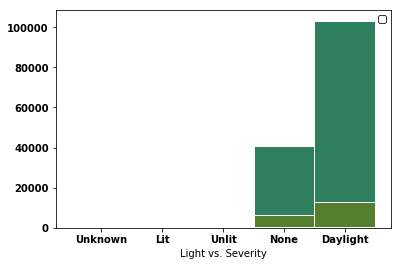

In [47]:
# Stacked bar chart
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1_fatal = [3, 5, 11, 494, 618]
bars2_serious = [39, 43, 71, 6037, 12175]
bars3_slight = [151, 233, 450, 34428, 90464]
 
# Heights of bars1 + bars2
bars = np.add(bars1_fatal, bars2_serious).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['Unknown','Lit','Unlit','None','Daylight']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1_fatal, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2_serious, bottom=bars1_fatal, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3_slight, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Light vs. Severity")
 
# Show graphic
plt.legend(loc ='upper right', frameon = True, edgecolor = 'black')
plt.show()

In [48]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )
light_donut = df.groupby(['Severity', 'Light']).count()

# Convert to DataFrame
light_donut_df = pd.DataFrame( light )[['Year']]

# Preview DataFrame
light_donut_df

Year
Light                       Severity       
Darkness - lighting unknown Fatal         5
                            Serious      71
                            Slight      450
Darkness - lights lit       Fatal       494
                            Serious    6037
                            Slight    34428
Darkness - lights unlit     Fatal         3
                            Serious      43
                            Slight      233
Darkness - no lighting      Fatal        11
                            Serious      39
                            Slight      151
Daylight                    Fatal       618
                            Serious   12175
                            Slight    90464

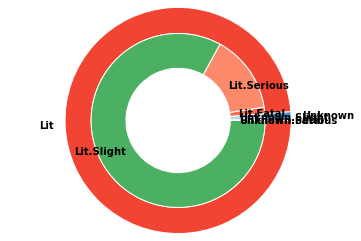

In [49]:
# Donut plot with subgroups
# Make data: I have 5 groups and 3 subgroups
group_names=['Unknown', 'Lit']
group_size=[526,40959]
subgroup_names=['Unknown.Fatal', 'Unknown.Serious', 'Unknown.Slight', 'Lit.Fatal', 'Lit.Serious', 'Lit.Slight']
subgroup_size=[5,71,450,494,6037,34428]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


<span style="color:red">**>>>>>>> remote**</span>

trend2 description / question / prompt

<span style="color:red">**<<<<<<< local**</span>

In [50]:
# Combining similar weather conditions together
weather_df = df[['Weather', 'Year', 'Severity']]

weather_df['Weather'] = weather_df["Weather"].replace(
   {"Fine + high winds": "Fine", "Fine no high winds": "Fine",
   "Raining + high winds": "Raining",
   "Raining no high winds": "Raining",
   "Snowing + high winds":"Snowing",
   "Snowing no high winds": "Snowing",
   "Unknown": "Other"})
weather_df.head()

C:\Users\Bails\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Weather,Year,Severity
Accident,,,
200501BS00001,Raining,2005,Serious
200501BS00002,Fine,2005,Slight
200501BS00003,Fine,2005,Slight
200501BS00004,Fine,2005,Slight
200501BS00005,Fine,2005,Slight


In [51]:
# Convert to DataFrame
weather = pd.DataFrame( weather_gb )[['Year']]

#Preview Dataframe
weather

NameError: name 'weather_gb' is not defined

In [ ]:
# Bar chart
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [1004, 5, 22, 99, 1]
bars2 = [15890, 42, 451, 1914, 68]
bars3 = [108444, 260, 2721, 13578, 723]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Fatal')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='Serious')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='Slight')
 
# Add xticks on the middle of the group bars
plt.xlabel('Weather Conditions')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Fine','Fog/Mist', 'Other/Unknown', 'Rain', 'Snow'], rotation = 45)
 
# Create legend & Show graphic
plt.legend()
plt.show()

<span style="color:red">**=======**</span>

In [52]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )
weather = df.groupby(['Weather','Severity']).count()

# Convert to DataFrame
weather_df = pd.DataFrame( weather )[['Year']]

# Preview DataFrame
weather_df

Year
Weather               Severity        
Fine + high winds     Fatal         12
                      Serious      116
                      Slight       595
Fine no high winds    Fatal        992
                      Serious    15774
                      Slight    107849
Fog or mist           Fatal          5
                      Serious       42
                      Slight       260
Other                 Fatal         12
                      Serious      302
                      Slight      1706
Raining + high winds  Fatal          5
                      Serious       95
                      Slight       550
Raining no high winds Fatal         94
                      Serious     1819
                      Slight     13028
Snowing + high winds  Serious        8
                      Slight        49
Snowing no high winds Fatal          1
                      Serious       60
                      Slight       674
Unknown               Fatal         10
                      Serious      149
                      Slight      1015

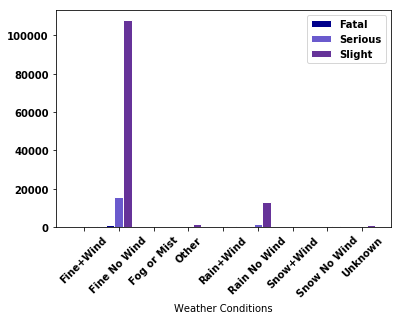

In [53]:
# Bar chart
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 992, 5, 12, 5, 94, 0, 1, 10]
bars2 = [116, 15774, 42, 302, 95, 1819, 8, 60, 149]
bars3 = [595, 107849, 260, 1706, 550, 13028, 49, 674, 1015]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='darkblue', width=barWidth, edgecolor='white', label='Fatal')
plt.bar(r2, bars2, color='slateblue', width=barWidth, edgecolor='white', label='Serious')
plt.bar(r3, bars3, color='rebeccapurple', width=barWidth, edgecolor='white', label='Slight')
 
# Add xticks on the middle of the group bars
plt.xlabel('Weather Conditions')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Fine+Wind', 'Fine No Wind', 'Fog or Mist', 'Other', 'Rain+Wind', 'Rain No Wind', 'Snow+Wind', 'Snow No Wind', 'Unknown'], rotation = 45)
 
# Create legend & Show graphic
plt.legend()
plt.show()

<span style="color:red">**>>>>>>> remote**</span>

In [ ]:
# visualization of data
# consider the best visualization for what you want to show

In [ ]:
# free space

trend3 description / question / prompt

<span style="color:red">**<<<<<<< local**</span>

In [ ]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )

<span style="color:red">**=======**</span>

In [ ]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )
time = df.groupby(['Severity','Time']).count()

# Convert to DataFrame
time_df = pd.DataFrame( time )[['Year']]

# Preview DataFrame
time_df

In [ ]:
# line chart
#https://stackoverflow.com/questions/1574088/plotting-time-in-python-with-matplotlib
#https://matplotlib.org/gallery/api/two_scales.html
# Data
df=pd.DataFrame({'x': datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(12),
                 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11),
                 'y3': np.random.randn(10)+range(11,21)})

# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='', color='skyblue', linewidth=2, label="Fatal")
plt.plot( 'x', 'y2', data=df, marker='', color='orange', linewidth=2, label="Serious")
plt.plot( 'x', 'y3', data=df, marker='', color='red', linewidth=2, label="Slight")
plt.legend()

# beautify the x-labels
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.show()

<span style="color:red">**>>>>>>> remote**</span>

In [ ]:
# preview of data

In [ ]:
# visualization of data
# consider the best visualization for what you want to show

Any comments on observations?

## Weather and Road Conditions

## by Fiona Weston

### Does traffic control actually help lower the number of accidents?

In [71]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )
severity_df = df.replace({"Data missing or out of range": "Unknown",
                "Give way or uncontrolled": "Yield or uncontrolled"})
severity_gb = severity_df.groupby(["Severity","Traffic Control"]).size()
severity_gb

Severity  Traffic Control      
Fatal     Authorised person            3
          Auto traffic signal        218
          Stop sign                    2
          Unknown                    434
          Yield or uncontrolled      474
Serious   Authorised person           25
          Auto traffic signal       3638
          Stop sign                   44
          Unknown                   5572
          Yield or uncontrolled     9086
Slight    Authorised person          144
          Auto traffic signal      24432
          Stop sign                  221
          Unknown                  34315
          Yield or uncontrolled    66614
dtype: int64

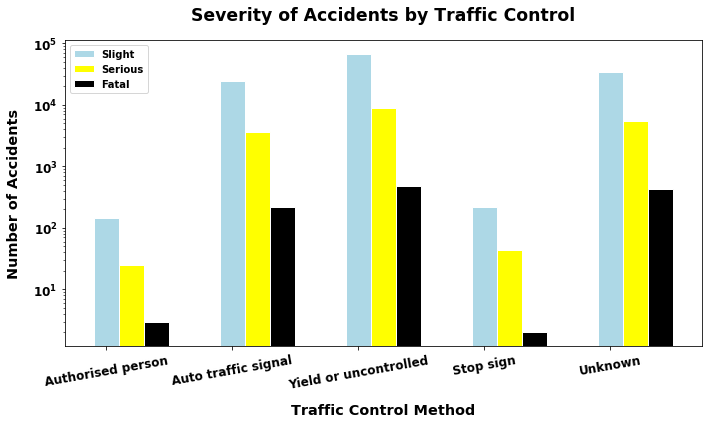

<Figure size 432x288 with 0 Axes>

In [73]:
# list severity types and traffic control methods
fatal = []
serious = []
slight = []
listofcontrols = ["Authorised person", "Auto traffic signal", "Yield or uncontrolled", "Stop sign", "Unknown" ]

# populate severity lists by traffic control method
for control in listofcontrols:
    fatal.append(severity_gb['Fatal'][control])
    serious.append(severity_gb['Serious'][control])
    slight.append(severity_gb['Slight'][control])

# setup graph    
fatal_begin = np.add(slight, serious).tolist()
bar_width = .2
fig, ax = plt.subplots(figsize = (10,6))
idx = np.asarray([i for i in range(len(listofcontrols))])

# create multi-bar graph
ax.bar(idx,slight, color="lightblue", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width, serious,color="yellow", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width*2, fatal, color="black", edgecolor = "white", width=bar_width)

# set parameters for x and y ticks
ax.set_xticks(idx)
ax.set_yscale('log')

# label and format ticks
ax.set_xticklabels(listofcontrols, fontweight='bold', fontsize='large', rotation=10)
for tick in ax.get_yticklabels():
    tick.set_fontsize("large")
    tick.set_fontweight("bold") 

# label and format axes and graph
ax.set_xlabel("Traffic Control Method", labelpad=12, fontweight='bold', fontsize='x-large')
ax.set_ylabel("Number of Accidents", labelpad=12, fontweight='bold', fontsize='x-large')
ax.legend(['Slight', 'Serious', 'Fatal'])
ax.set_title("Severity of Accidents by Traffic Control", pad=20, fontweight='bold', fontsize='xx-large')

# format and view graph
fig.tight_layout()
plt.show()

# Save figure as .png
plt.savefig( "./Visuals/tiraffic_vs_severity.png", bbox='tight')





### Does rain or wet road surfaces increase the number of accidents?

In [74]:
# pull relevant data from master dataframe
severity_df = df.replace({"Data missing or out of range": "Unknown",
                "Frost or ice": "Ice or snow",
                "Snow": "Ice or Snow",
                "Wet or damp": "Damp or wet",
                "Flood over 3cm. deep": "Flood (>3cm)"})
severity_gb = severity_df.groupby(["Severity","Road Cond."]).size()
severity_gb

Severity  Road Cond.  
Fatal     Damp or wet        229
          Dry                892
          Ice or snow         10
Serious   Damp or wet       3436
          Dry              14734
          Flood (>3cm)         6
          Ice or Snow         42
          Ice or snow        147
Slight    Damp or wet      23168
          Dry             101008
          Flood (>3cm)        39
          Ice or Snow        438
          Ice or snow       1069
          Unknown              4
dtype: int64

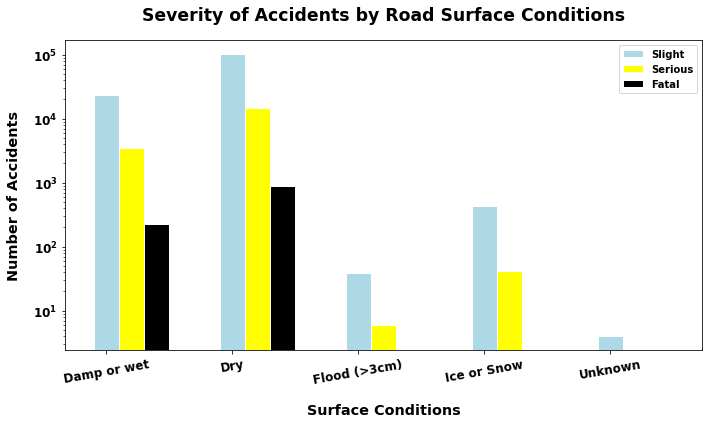

<Figure size 432x288 with 0 Axes>

In [75]:
# list severity types and weather
fatal = []
serious = []
slight = []
listofRoadConds = ["Damp or wet", "Dry", "Flood (>3cm)", "Ice or Snow", "Unknown"]

# populate severity lists by weather
for cond in listofRoadConds:
    if cond in severity_gb['Fatal']:
        fatal.append(severity_gb['Fatal'][cond])
    else:
        fatal.append(0)
    if cond in severity_gb['Serious']:
        serious.append(severity_gb['Serious'][cond])
    else:
        serious.append(0)
    if cond in severity_gb['Slight']:
        slight.append(severity_gb['Slight'][cond])
    else:
        slight.append(0)
    
# setup graph
bar_width = .2
fig, ax = plt.subplots(figsize = (10,6))
idx = np.asarray([i for i in range(len(listofRoadConds))])

# create multi-bar graph 
ax.bar(idx, slight, color="lightblue", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width, serious, color="yellow", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width*2, fatal, color="black", edgecolor="white", width=bar_width)

# set parameters for x and y ticks
ax.set_xticks(idx)
ax.set_yscale('log')

# label and format ticks
ax.set_xticklabels(listofRoadConds, fontweight='bold', fontsize='large',rotation=10)
for tick in ax.get_yticklabels():
    tick.set_fontsize("large")
    tick.set_fontweight("bold")

# label and format axes and graph
ax.set_xlabel("Surface Conditions", labelpad=17, fontweight='bold', fontsize='x-large')
ax.set_ylabel("Number of Accidents", labelpad=12, fontweight='bold', fontsize='x-large')
ax.legend(['Slight', 'Serious', 'Fatal'])
ax.set_title("Severity of Accidents by Road Surface Conditions", pad=20, fontweight='bold', fontsize='xx-large')

# format and view graph
fig.tight_layout()
plt.show()

# Save figure as .png
plt.savefig( "./Visuals/road_vs_severity.png", bbox='tight')

### Are areas with a higher speed limit more prone to accidents?

In [76]:
# re-format/style data for trend3
severity_df = df.groupby(["Severity","Speed Limit"]).size()

severity_df

Severity  Speed Limit
Fatal     20                  5
          30                948
          40                 95
          50                 51
          60                  6
          70                 26
Serious   20                 44
          30              17093
          40                574
          50                466
          60                 37
          70                151
Slight    10                  1
          15                  2
          20                240
          30             117627
          40               3529
          50               3044
          60                163
          70               1120
dtype: int64

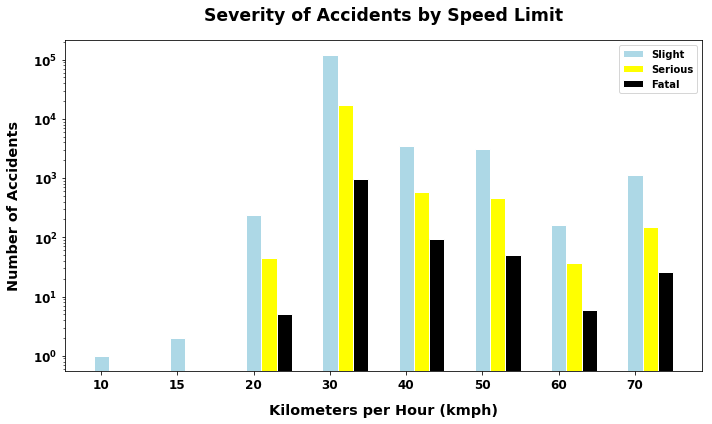

<Figure size 432x288 with 0 Axes>

In [77]:
# list severity types and speed limits
fatal = []
serious = []
slight = []
listofSpeedLimit = [10,15,20,30,40,50,60,70]

# populate severity lists by speed limit
for SpeedLimit in listofSpeedLimit:
    if SpeedLimit in severity_df['Fatal']:
        fatal.append(severity_df['Fatal'][SpeedLimit])
    else:
        fatal.append(0)
    if SpeedLimit in severity_df['Serious']:
        serious.append(severity_df['Serious'][SpeedLimit])
    else:
        serious.append(0)
    if SpeedLimit in severity_df['Slight']:
        slight.append(severity_df['Slight'][SpeedLimit])
    else:
        slight.append(0)

# setup graph
fatal_begin = np.add(slight, serious).tolist()
bar_width = .2
fig, ax = plt.subplots(figsize = (10,6))
idx = np.asarray([i for i in range(len(listofSpeedLimit))])

# create multi-bar graph 
ax.bar(idx, slight, color="lightblue", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width, serious, color="yellow", edgecolor="white", width=bar_width)
ax.bar(idx+bar_width*2, fatal, color="black", edgecolor="white", width=bar_width)

# set parameters for x and y ticks
ax.set_xticks(idx)
ax.set_yscale('log')

# label and format ticks
ax.set_xticklabels(listofSpeedLimit, fontweight='bold', fontsize='large')
for tick in ax.get_yticklabels():
    tick.set_fontsize("large")
    tick.set_fontweight("bold")

# label and format axes and graph
ax.set_xlabel("Kilometers per Hour (kmph)", labelpad=12, fontweight='bold', fontsize='x-large')
ax.set_ylabel("Number of Accidents", labelpad=12, fontweight='bold', fontsize='x-large')
ax.legend(['Slight', 'Serious', 'Fatal'])
ax.set_title("Severity of Accidents by Speed Limit", pad=20, fontweight='bold', fontsize='xx-large')

# format and view graph
fig.tight_layout()
plt.show()

# Save figure as .png
plt.savefig( "./Visuals/speed_vs_severity.png", bbox='tight')